# Домашнее задание 7-9

(прислать до 02:00 09.03.2019)

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 
При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Пусть $\varphi: \mathbb{R} \to \mathbb{R}$ возрастающая и выпуклая функция. Также $f: \mathbb{R}^n \to \mathbb{R}$ выпуклая, следовательно $g(x) = \varphi(f(x))$ также выпуклая функция. Также пусть $f$ и $g$ дважды диференцируемы.

- (0.4 pts) Как связаны между собой задачи минимизации $f$ и $g$?
- (0.6 pts) Сравните градиентный метод и метод Ньютона для решения задач минимизации $f$ и $g$. Как связаны направления, получаемые каждым из методов? Как связаны методы в случае использования наискорейшего спуска для выбора шага?

## Решение задачи 1.

### Пункт 1.

1) Если $x^*$ дает минимум $f$, то эта же точка доставляет минимум $g$.

**Доказательство:**

$$\left\{\forall x \Rightarrow f(x) \geq f(x^*)\right\} \Rightarrow g(x) = \phi(f(x)) \geq \phi(f(x^*)) = g(x^*)$$

Вторая импликация верна в силу возрастания $\phi$. $\square$

2) Если $x^*$ дает минимум $g$ и $\phi$ -строго возрастающая, то эта же точка доставляет минимум $f$.

**Доказательство:**

Пусть $g^*:= g(x^*)$. В силу строгой монотонности $\phi$, у нее есть обратная. Тогда мы можем определить $f^* = \phi^{-1}(g^*)$. В силу того, что $x^*$ доставляет минимум $g$, то $f^*$ доставляет минимум $\phi$. В силу строгого возрастания $\phi$, $\min_{x\in X}f(x) = f^*$. И $x^*$ доставляет этот минимум.$\square$

3) Условие на строгое возрастание $\phi$ в предыдущем утверждении является существенным.

**Контрпример:**
$$\phi(x) = \max(0, x), f(x) = x, X = [-1, 1]$$
$$g(x) = \max(0,x). X=[-1, 1]$$

Функции удовлетворяют условию задачи: $f$ - аффинная функция, а, следовательно, и выпуклая, $\phi$ - выпуклая, как максимум выпуклых аффинных функций, и, очевидно, немонотонно возрастающая.

$$0 \in \arg\min_x(g(x))$$
$$0=f(0)> \min_xf(x) = f(-1) = -1$$

### Пункт 2

#### Градиентный спуск

Шаг GD для $f$:

$$\boxed{x_{k+1} = x_k - \alpha_k f'(x_k)}$$

Шаг GD для $g$:

$$x_{k+1} = x_k - \alpha_k g'(x_k)$$

$$\boxed{x_{k+1} = x_k - \alpha_k \phi'(y)|_{y = f(x_k)}f'(x_k)}$$

В силу того, что $\phi$ - возрастающая функция, ее производная в каждой точке неотрицательная. Значит, если $\phi'(y)|_{y = f(x_k)} \neq 0$ (для строго возрастающей функции это выполнено), направления в этих шагах коллинеарны, а коэффицент между ними - $\phi'(y)|_{y = f(x_k)}$.

#### Наискорейший спуск

Для функции $f$:

$$\alpha_k \in \arg\min_\alpha\left[f\left(x_k - \alpha f'(x_k)\right)\right]$$

Для функции $g$:

$$\alpha_k \in \arg\min_\alpha\left[g\left(x_k - \alpha \phi'(y)|_{y = f(x_k)}f'(x_k)\right)\right]$$

Из первого пункта следует, что

$$\arg\min_\alpha\left[f\left(x_k - \alpha f'(x_k)\right)\right] \subseteq \arg\min_\alpha\left[g\left(x_k - \alpha \phi'(y)|_{y = f(x_k)}f'(x_k)\right)\right],$$
причем если $\phi$ - строго возрастающая, то верно вложение в другую сторону. Значит, для функции $g$ можно брать за значение $\alpha_k$ любое значение из $\arg\min_\alpha\left[f\left(x_k - \alpha f'(x_k)\right)\right]$. Найти данный $\arg\min$ может быть проще, чем найти $\arg\min$ для $g$.

#### Метод Ньютона

Шаг метода Ньютона для $f$:

$$\boxed{x_{k+1} = x_k - \alpha_k [f''(x_k)]^{-1}f'(x_k)}$$

Шаг метода Ньютона для $g$:

$$x_{k+1} = x_k - \alpha_k [g''(x_k)]^{-1}g'(x_k)$$

Найдем вторую производную $g$:

$$g''(x_k) = (\phi'(y)|_{y = f(x_k)}f'(x_k))' = \phi'(y)|_{y = f(x_k)}f''(x_k) + \phi''(y)|_{y = f(x_k)}f'(x_k)(f'(x_k))^\top$$

Тогда шаг Ньютона для $g$:

$$\boxed{x_{k+1} = x_k - \alpha_k B^{-1}\phi'(y)|_{y = f(x_k)}f'(x_k),} $$
где $B = \phi'(y)|_{y = f(x_k)}f''(x_k) + \phi''(y)|_{y = f(x_k)}f'(x_k)(f'(x_k))^\top$

Заметим, что $B$ - неотрицательно определена. Сделаем следующие замечания, из которых это следует: 
* $f''(x_k)$ - неотрицательно определена в силу выпуклости $f$, 

* $A = f'(x_k)(f'(x_k))^\top$ - неотрицательно определна, т.к. $\forall y \in \mathbb{R}^n y^\top A y = (y^\top f'(x_k))((f'(x_k))^\top y) = (y^\top f'(x_k)) \geq 0$

* $\phi'\geq 0$ - в силу возрастания $\phi$, $\phi''$ - неотрицательно в силу выпуклости $\phi$.

Значит $B$ - неотрицательно определенная квадратичная матрица, как коническая оболочка неотрицательно определенных квадратичных матриц.

Утверждение, что коническая оболочка неотрицательно определенных квадратичных матриц есть неотрицательно определенная квадратичная матрица доказывается тривиально:

$$A, B \succeq 0, \alpha, \beta \geq 0 \Rightarrow \forall x\, x^\top(\alpha A + \beta B)x = \alpha(x^\top A x) + \beta (x^\top B x) \geq 0$$
 
Тогда получаем, что направления, полученные в шагах метода Ньютона для $f$ и $g$, лежат в одном полупространстве при условии, что матрицы $B$ и $f''(x_k)$ невырождены:

$$\left([g''(x_k)]^{-1}g'(x_k), [f''(x_k)]^{-1}f'(x_k)\right) = (\phi'(y)|_{y = f(x_k)})^2(f'(x_k))^\top B^{-\top}[f''(x_k)]^{-1} f'(x_k)\geq 0,$$

т.к. матрица $B^{-\top}[f''(x_k)]^{-1}$ неотрицательно определена в силу неотрицательной определенности $B$ и $f''(x_k)$.

## Задача 2

- (0.4 pts) Для задачи

$$
\ln (e^x + e^{-x}) \to \min
$$

запустите метод Ньютона с постоянным шагом $\alpha = 1$ из точки $x_0 = 1$ и $x_0 = 1.1$. Что Вы заметили и почему?
- (0.4 pts) Что произойдёт, если использовать демпфированный метод Ньютона? Почему?
- (0.2 pts) Постройте графики сходимости для каждой постановки эксперимента и оцените время работы каждого метода.
При сравнении сходимости для разных условий стройте линии на одном графике и добавляйте легенду, иначе очень сложно понять, что происходит.
Также для сравнения сходимости достаточно указывать изменение нормы градиента, чтобы не загромождать рисунок.

In [ ]:
# Место для Вашего решения

## Задача 3
- (0.2 pts) Покажите, что справедлива формула Шермана-Моррисона-Вудбери

$$
(A + UV)^{-1} = A^{-1} - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1},
$$
где $A \in \mathbb{R}^{n \times n}$, $U \in \mathbb{R}^{n \times k}$ и $V \in \mathbb{R}^{k \times n}$.

- (0.2 pts) Покажите, что преобразование DFP даёт положительно определённую оценку для гессиана $B_{k+1}$
- (0.4 pts) Выведите (а не покажите, что формула справедлива!) формулу для $H_k$ в методе DFP
- Реализуйте BFGS метод и сравните его сходимость с методом Ньютона 
    - (0.3) для задачи минимизации функции Розенброка из $x_0 = (-1.2, 1)$
    - (0.5) для задачи

    $$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
    $$

- (0.4) Попробуйте разные условия (достаточного убывания, существенного убывания, условие кривизны) для выбора шага $\alpha_k$ (сравните минимум два условия), всегда ли выполнялось условие $s^{\top}_k y_k > 0$?

## Решение задачи 3

### Пункт 1: формула Шермана-Моррисона-Вудбери

Умножим слева:

$$\left(A^{-1} - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1}\right)\left(A + UV\right) = $$
$$ = I - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V +$$
$$ + A^{-1}UV - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1}UV =$$
$$ = I - \underbrace{A^{-1}U\left( I_k + V A^{-1} U \right)^{-1}\left(I + V A^{-1}U\right)V}_{=A^{-1}UV} + A^{-1}UV = I$$

Умножим справа:

$$\left(A + UV\right)\left(A^{-1} - A^{-1} U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1}\right) = $$

$$ = I - U \left( I_k + V A^{-1} U \right)^{-1} VA^{-1} +$$
$$ + UVA^{-1} -  UV A^{-1}U \left( I_k + V A^{-1} U \right)^{-1} V A^{-1}=$$
$$ = I - \underbrace{U\left( I_k + V A^{-1} U \right)^{-1}\left(I + V A^{-1}U\right)VA^{-1}}_{=UVA^{-1}} + UVA^{-1} = I$$

На этом формулу можно считать доказанной.$\square$

### Пункт 2: положительная определенность в DFP

Из DFP:

$$B_{k+1} = (I - \rho_ky_ks_k^\top) B_k (I - \rho_ks_ky_k^\top) + \rho_ky_ky_k^\top,$$

где $\rho_k = \frac{1}{y_k^\top s_k}$. 

Докажем положительную определенность по индукции. $B_0$ такое в силу правильной инициализации. Теперь пусть $B_k$ - положительно определенная матрица. Зафиксируем произвольный вектор $x$.

$$B_{k+1} = (I - \rho_ks_ky_k^\top)^\top B_k (I - \rho_ks_ky_k^\top) + \rho_ky_ky_k^\top$$

$$x^\top B_{k+1} x = c^\top B_k c + \rho (y_k^\top x)^2,$$

где $c = x - \rho_k (y_k^\top x)s_k$.

По предположению индукции $B_k$ - положительно определена, тогда оба слагаемы неотрицательны. Более того, если $x$ не нулевой, то как минимум одно из слагаемых ненулевое. Действительно, если второе слагаемое нулевое, то $y_k^\top x =0$, и тогда $c = x$. Из этого и положительной определенности  $B_k$ следует, что первое слагаемое ненулевое. Значит,по определению, $B_{k+1}$ положительно определленна.

### Пункт 3: вывод DFP

$$H_{k+1} = B_{k+1}^{-1} = \left(C^\top B_k^{-1}C + (\rho_ky_k y_k^\top)\right)^{-1},$$
где $C = I - \rho_k s_k y_k^\top$.

Найдем $C^{-1}$ по формуле ШМВ:

$$C^{-1} = I + \rho_k\frac{s_k y_k^\top}{1 - \rho_k y_k^\top s_k}$$

$$B_{k+1}^{-1} = $$
$$\text{Формула Шеррона-Моррисона-Вудбери для $\left\{A = C^\top B_k C, U = \rho_k y_k, V = y_k^\top\right\}$}$$
$$= C^{-1}B_k^{-1}C^{-\top} - \rho_k\frac{C^{-1}B_k^{-1}C^{-\top} y_k y_k^\top C^{-1}B_k^{-1}C^{-\top}}{1 + \rho_ky_k^\top C^{-1}B_k^{-1}C^{-\top}y_k} = $$

$$= \left(I + \rho_k\frac{s_k y_k^\top}{1 - \rho_ky_k^\top s_k}\right)H_k \left(I + \rho_k\frac{y_k s_k^\top}{1 - \rho_k y_k^\top s_k}\right) - $$
$$- \rho_k\frac{C^{-1}H_kC^{-\top} y_k y_k^\top C^{-1}H_kC^{-\top}}{1 + \rho_ky_k^\top C^{-1}H_kC^{-\top}y_k}$$

## Задача 4 (1 pts)

Предложите свой квазиньютоновский метод, реализуйте его и сравните скорость его сходимости (по времени и по итерациям) с методом Ньютона и с методом BFGS, который Вы реализовали в задаче 3. Для сравнения используйте задачу 

$$
    \min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right).
$$

Обоснуйте (хотя бы в общих чертах), почему Ваш метод будет работать. 
Строгого доказательства я не требую, но мотивацию, которой Вы руководствовались, пожалуйста, приведите. 

In [ ]:
# Место для Вашего решения

## Задача 5

_1._ (0.6 pts) Реализуйте метод Левенберга-Марквардта

_2._ (0.2 pts) Сгенерируйте синтетические данные для решения задачи определения местоположения по расстояниям до известных объектов. То есть, Вам надо определить текущее положение человека $x$ по известным расстояниям $\rho_i$ до каждого из $N$ объектов с известными координатами $y_i$. Такая задача может быть записана следующим образом

$$
\min_x \sum_{i=1}^N (\|x - y_i\|^2_2 - \rho_i)^2
$$

Является ли эта задача выпуклой и почему?

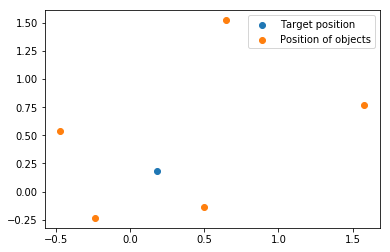

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)
# We consider objects in plane for simplicity. In 3D you can use the same approach
n = 2
# Number of objects
m = 5
# Coordinates of the objects
y = np.random.randn(m, n)
# Ground-truth target position
xtrue = np.random.rand(1, n)
# Distances between ground-truth position and known objects
l2_distances = np.sum((y - xtrue)**2, axis=1)

plt.scatter(xtrue[0, 0], xtrue[0, 1], label="Target position")
plt.scatter(y[:, 0], y[:, 1], label="Position of objects")
plt.legend()

_3._ (0.4 pts) Покажите, что Ваша реализация работает, решив с её помощью вышепоставленную задачу с использованием сгенерированных данных. Совпадает ли найденное решение с правильным ответом, по отношению к которому генерировались расстояния?  Сравните точность решения с работой [стандартного решателя](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) этой задачи из ```scipy.optimize```, не забудьте явно указать, что Вы хотите решить задачу методом Левенберга-Марквардта

_4._ (0.3 pts) Запустите Ваш метод для различных начальных приближений. Всегда ли метод сходится в одну и ту же точку? Почему? Нарисуйте линии уровня целевой функции с помощью функции ```plt.countourf``` или её аналогов. Пример использования можно посмотреть [тут](https://matplotlib.org/gallery/images_contours_and_fields/contourf_log.html#sphx-glr-gallery-images-contours-and-fields-contourf-log-py)

_5._ (0.2 pts) Проанализируйте численно, какое минимальное количество объектов $y_i$ необходимо для восстановления координат $x$?

In [ ]:
# Место для Вашего решения